In [99]:


import json
import seaborn as sns
import us
import geopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytz import timezone
from datetime import datetime
import calendar
import plotly.graph_objects as go

In [ ]:
tweet_pd = pd.DataFrame()

In [5]:
fileName1 = 'data/fileName.csv'
fileName2 = 'data/combine_state.csv'
fileName3 = 'data/full_pd.csv'

pd_1 = pd.read_csv(fileName1,lineterminator="\n")
pd_2 = pd.read_csv(fileName2,lineterminator="\n")
pd_3 = pd.read_csv(fileName3,lineterminator="\n")


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,5,7,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
tweet_pd = pd.concat([pd_1,pd_2,pd_3])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
del pd_1,pd_2,pd_3

In [21]:
tweet_pd = tweet_pd[tweet_pd['location'].notnull()] 
tweet_pd = tweet_pd[tweet_pd['screen_name'].notnull()]
del tweet_pd[u'Unnamed: 0.1']
del tweet_pd[u'Unnamed: 0']
del tweet_pd[u'level_0']

In [27]:
# tweet_pd = tweet_pd[tw_state['us_state']!='undefined']
tweet_pd.head()

index                      created_at  \
0      0  Tue Nov 11 03:05:40 +0000 2014   
1      1  Sun Jan 11 18:01:50 +0000 2015   
2      2  Tue Jan 29 12:30:57 +0000 2013   
3      3  Tue Apr 30 10:37:22 +0000 2013   
4      4  Tue Jun 07 01:16:45 +0000 2011   

                                         description  favourites_count  \
0  follow this account for my videos my main acco...             154.0   
1  元気をくれるニコ動活動者様に感謝を。 F/R/B御自由に →必読 http://twpf.j...            6846.0   
2  Official Twitter of Posh Rocks Jewellery. Gorg...              42.0   
3                     ✿ from stratford to my heart ❀              24.0   
4  Amor eterno a NTVG y MI NOVIO♥   by: Ayeléη Ve...             274.0   

   followers_count friends_count  geo            id      id_str lang  \
0            470.0           246  NaN  2.896116e+09  2896116152   en   
1             63.0           541  NaN  2.975194e+09  2975193559   ja   
2            470.0           847  NaN  1.130908e+09  1130907732   en   
3           1156.0           662  NaN  1.391759e+09  1391759287   en   
4            403.0           374  NaN  3.123751e+08   312375117   pt   

   listed_count    location place      screen_name  statuses_count   us_state  \
0          72.0   Minnesota   NaN         pete4725        636820.0  Minnesota   
1           6.0     サタン・蘭たん   NaN        hiiro_ret         23899.0  undefined   
2           6.0  Nottingham   NaN  PoshRocksjewels           440.0   Michigan   
3           4.0      greece   NaN   OnlyLikeBieber          2801.0  undefined   
4           1.0    La plata   NaN      AAsheeveron         20048.0   Colorado   

  verified  
0    False  
1    False  
2    False  
3    False  
4    False

In [30]:
tw_state = tweet_pd.groupby(['us_state']).size().reset_index(name='freq')
tw_state = tw_state.sort_values(ascending = False, by = 'freq')
tw_state["type"] = "tweets" 
tw_state = tw_state[tw_state['us_state']!='undefined']

In [31]:
tw_state.head(6)

us_state    freq    type
77       Texas  206113  tweets
13  California  144335  tweets
45    Missouri  138033  tweets
29    Illinois  136262  tweets
25     Georgia   93478  tweets
53    New York   88739  tweets

In [34]:
check_usr = tweet_pd.groupby(['us_state', 'screen_name']).size().reset_index(name='freq')
check_usr = check_usr.groupby(['us_state']).size().reset_index(name='freq')
check_usr = check_usr.sort_values(ascending = False, by = 'freq')
check_usr["type"] = "users" 
check_usr = check_usr[check_usr['us_state']!='undefined']

In [35]:
check_usr.head()

us_state    freq   type
77       Texas  138153  users
13  California   95625  users
29    Illinois   94509  users
45    Missouri   88686  users
25     Georgia   57653  users

In [39]:
tw_vis = pd.concat([tw_state.head(10), check_usr.head(10)])

In [36]:
tweet_full = pd.merge(check_usr, tw_state, on='us_state')

In [37]:
tweet_full.head()

us_state  freq_x type_x  freq_y  type_y
0       Texas  138153  users  206113  tweets
1  California   95625  users  144335  tweets
2    Illinois   94509  users  136262  tweets
3    Missouri   88686  users  138033  tweets
4     Georgia   57653  users   93478  tweets

[Text(0,0.5,'Frequency'), Text(0.5,0,'US States')]

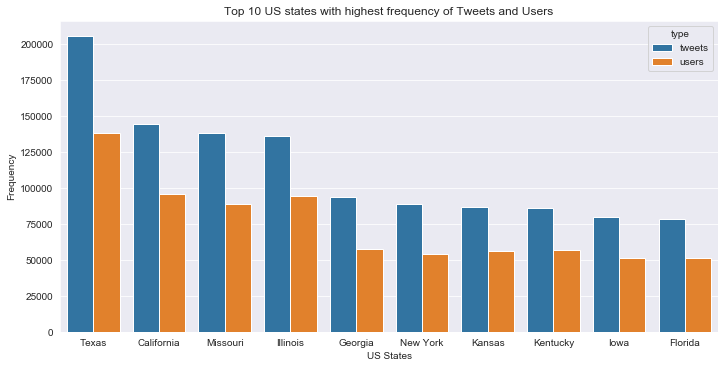

In [43]:
sns.set_style("darkgrid")
_, ax1 = plt.subplots(1,1, figsize=(10, 5), constrained_layout=True)
sns.barplot(x= "us_state", y="freq", data = tw_vis , ax = ax1, hue="type").set_title("Top 10 US states with highest frequency of Tweets and Users")
ax1.set(xlabel='US States',ylabel='Frequency')

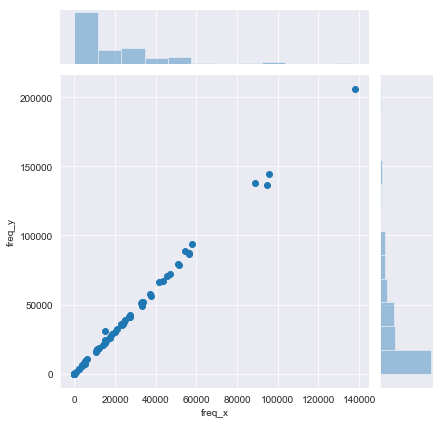

In [46]:
sns.jointplot(x="freq_x", y="freq_y", data=tweet_full)

In [47]:
#defs 
def latZones(x):
    zone1 = ['Wisconsin','Washington','Montana','North Dakota','Michigan','Oregon','South Dakota','Minnesota','Idaho','Iowa','Pennsylvania','New York','Connecticut','Rhode Island','Vermont','New Hampshire','Virginia','Massachusetts','Maine','District of Columbia']
    zone2 = ['New Jersey','Illinois','Wyoming','Maryland','West Virginia','Ohio','Delaware','Indiana','Kentucky','Missouri','Kansas','Colorado','Utah','Nevada','California','Nebraska','Tennessee','North Carolina']
    zone3 = ['Arkansas','New Mexico','Arizona','Texas','Oklahoma','Louisiana','Mississippi','Alabama','Georgia','South Carolina','Florida']
    
    if x in zone1:
        return "North"
    elif x in zone2 :
        return "Central"
    elif x in zone3:
        return "South"
    return -1

def belts(x):
    sun_belt = ['Texas','California','Missouri','Florida','Mississippi','New Mexico','Arizona','Alabama','Arkansas','Louisiana','Nevada','Tennessee',"Utah",'District of Columbia']
    frost_belt = ['New York','Minnesota','New Jersey','Illinois','Massachusetts','Connecticut','Rhode Island','Vermont','Maine', 'Wiscosin','Michigan','Pennsylvania','Ohio','Indiana','South Dakota','Iowa','Virginia','West Virginia']
    
    if x in sun_belt:
        return "Sun Belt"
    elif x in frost_belt:
        return "Frost Belt"
    else:
        return -1
    
    

In [48]:
tweet_pd['Climate Belt'] = tweet_pd['us_state'].transform(belts)

In [49]:
tweet_pd['Latitude Belt'] = tweet_pd['us_state'].transform(latZones)   

In [50]:
lat_pd = tweet_pd.groupby(['Latitude Belt']).size().reset_index(name='Freq')
lat_pd = lat_pd.sort_values(ascending = False, by = 'Freq')

In [52]:
lat_pd = lat_pd[lat_pd['Latitude Belt']!=-1]
lat_pd

Latitude Belt    Freq
1       Central  989323
3         South  739275
2         North  715652

In [55]:
climate_pd = tweet_pd.groupby(['Climate Belt']).size().reset_index(name='Freq')
climate_pd = climate_pd.sort_values(ascending = False, by = 'Freq')
climate_pd = climate_pd[climate_pd['Climate Belt']!=-1]
climate_pd

Climate Belt    Freq
2     Sun Belt  901392
1   Frost Belt  798860

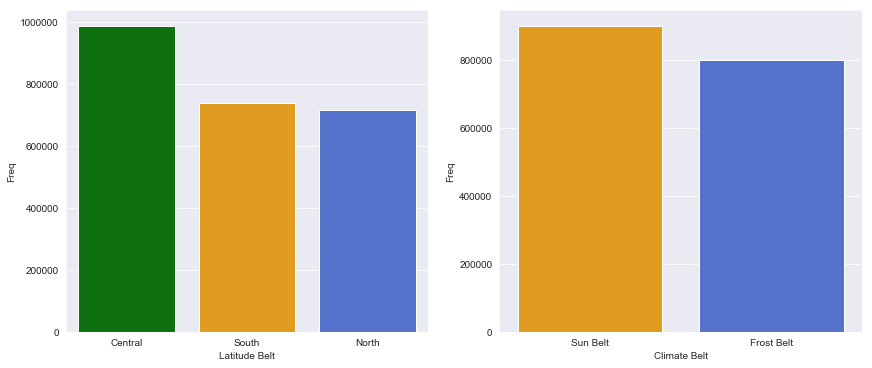

In [59]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5), constrained_layout=True)
sns.barplot(x= "Latitude Belt", y="Freq", data = lat_pd , ax = ax1,palette=['green','orange','royalblue'])
sns.barplot(x= "Climate Belt", y="Freq", data = climate_pd , ax = ax2,palette=['orange','royalblue'])

In [60]:
#timezone defs

def timezone_mod(x):
    zones = -1
    try:
        x = unicode(x)
    except:
        return zones
    try:
        zones = (us.states.lookup(x).time_zones)[0]
    except Exception as e:
        pass
    
    return (zones)



def tz_month(x):
    c_t = x[0]
    tzinfo = x[1]
    try:
        datetime_object = datetime.strptime(c_t, '%a %b %d %H:%M:%S +0000 %Y')
        t = timezone(tzinfo)
        g = timezone('GMT')
        g_d = g.localize(datetime_object)
        e_d = g_d.astimezone(t)
    except:
        return -1

    return calendar.month_name[e_d.month]


def season(x):
    spring = ['March','April','May']
    summer = ['June','July','August']
    fall = ['September','October','November']
    winter = ['December','January','February']
    
    if x in spring:
        return "spring"
    if x in summer:
        return "summer"
    if x in fall:
        return "fall"
    if x in winter:
        return "winter"
    print(x)
    return "seasonless"

def tz_func(x):
    c_t = x[0]
    tzinfo = x[1]
    try:
        datetime_object = datetime.strptime(c_t, '%a %b %d %H:%M:%S +0000 %Y')
        t = timezone(tzinfo)
        g = timezone('GMT')
        g_d = g.localize(datetime_object)
        e_d = g_d.astimezone(t)
    except:
        return -1

    return e_d.hour


def tz_day(x):
    c_t = x[0]
    tzinfo = x[1]
    try:
        datetime_object = datetime.strptime(c_t, '%a %b %d %H:%M:%S +0000 %Y')
        t = timezone(tzinfo)
        g = timezone('GMT')
        g_d = g.localize(datetime_object)
        e_d = g_d.astimezone(t)
    except:
        return -1
    
    return calendar.day_name[e_d.weekday()]

In [61]:
tweet_pd['timezone'] = tweet_pd['us_state'].apply(timezone_mod)

In [63]:
time_pd = tweet_pd.groupby(['timezone']).size().reset_index(name='Freq')
time_pd = time_pd.sort_values(ascending = False, by = 'Freq')
time_pd = time_pd[time_pd['timezone']!=-1]
time_pd.head()

timezone     Freq
2               America/Chicago  1151502
6              America/New_York   793810
5           America/Los_Angeles   243012
3                America/Denver   196726
4  America/Indiana/Indianapolis    41109

In [64]:
time_pd['freq_log'] = time_pd['Freq'].apply(np.log)

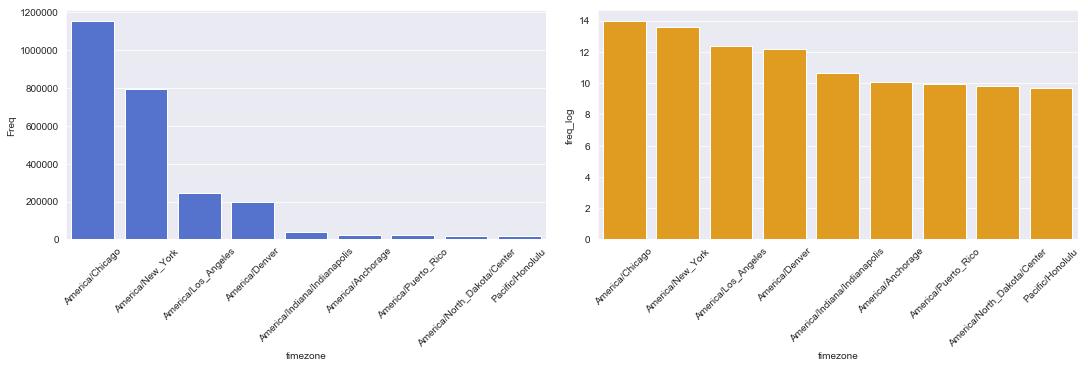

In [65]:
_, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5), constrained_layout=True)
sns.barplot(x= "timezone", y="Freq", data = time_pd , ax = ax1, palette=['royalblue'])
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
sns.barplot(x= "timezone", y="freq_log", data = time_pd , ax = ax2, palette=['orange'])
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

In [66]:
unq_users = tweet_pd.drop_duplicates(subset=['screen_name'])

In [67]:
def profession(x):
    global count
    x = str(x)
    doctor = ['doctor','cardiologist','dermatologist','physician','gynae','pediatrician','sexologist','psychiatrist','surgeon','oncologist','dentist','therapist','nurse']
    engineer = ['coder','java','programmer','software','engineer','system security',' sde',' swe',"architect", 'manager','banker','investor','investment','quant','scientist']
    artist = [' actor ',' actress ','musician','performer','standup','comedian','guitarist','singer','vocalist','pianist','lyricist','poet','novelist']
    CXO = ['CTO ','CEO ','COO ', 'CFO ','CMO ','CSO ','CIO ','CISO ']
    academics = ['phd', 'masters', 'graduate', 'student', 'intern', 'professor', 'teacher', 'researcher', 'sophomore', 'freshman', 'undergrad', 'postgrad', 'postdoc', 'college'
               ,'university', 'school']
    lawyer = ["judge", "lawyer", "legal", "magistrate", " law "]
    
    for d in doctor:
        if d in x.lower():
            return "Medical"
    
    for d in engineer:
        if d in x.lower():
            return "STEM/Finance"
        
    for d in artist:
        if d in x.lower():
            return "Artist"
        
    for d in lawyer:
        if d in x.lower():
            return "Law"
    
    for d in CXO:
        if d in x:
            return "CXO"
    
    for d in academics:
        if d in x.lower():
            return "Academics"
        
    return "Other"

In [68]:
unq_users['Profession'] = unq_users['description'].apply(profession)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
job_pd = unq_users.groupby(['Profession']).size().reset_index(name='freq')
job_pd = job_pd.sort_values(ascending = False, by = 'freq')

In [70]:
job_pd = job_pd[job_pd['Profession']!= "Other"]

In [72]:
job_pd

Profession   freq
0     Academics  78909
6  STEM/Finance  45428
1        Artist  24187
3           Law  11421
4       Medical  10716
2           CXO   4723

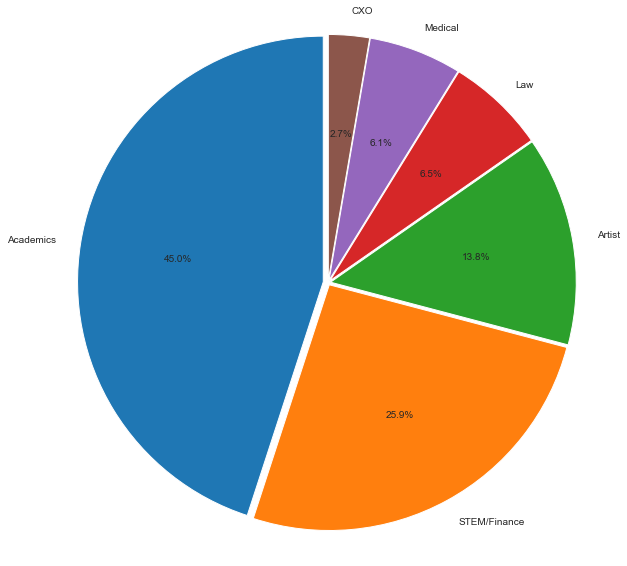

In [73]:
labels = 'Academics', 'STEM/Finance', 'Artist', 'Law', 'Medical', 'CXO'
sizes = [78909, 45428, 24187, 11421, 10716, 4723]
explode = ( 0.02 ,0.01,0.01, 0.01, 0.01, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [74]:
with_lang_pd = pd.read_csv("data/data_2.csv",lineterminator='\n')

In [76]:
with_lang_pd_nodup = with_lang_pd.drop_duplicates(subset=['screen_name'])

array(['ja', 'th', 'en', 'ko', 'es', 'und', 'fr', 'ar', 'pt', 'zh', 'ta',
       'in', 'ht', 'tl', 'ur', 'de', 'lv', 'hi', 'ru', 'bn', 'nl', 'ml',
       'it', 'pl', 'vi', 'tr', 'sl', 'fa', 'ca', 'et', 'da', 'te', 'sv',
       'sr', 'ro', 'no', 'cs', 'my', 'eu', 'cy', 'kn', 'mr', 'is', 'ne',
       'uk', 'hu', 'fi', 'lt', 'ps', 'el', 'pa', 'iw', 'bg', 'si', 'km',
       'gu', 'or', 'sd', 'ka', 'hy', 'lo', 'ckb', 'am', 'dv', 'ug'],
      dtype=object)

In [81]:
with_lang_pd_nodup=with_lang_pd_nodup[with_lang_pd_nodup['lang'].isna()==False]
with_lang_pd_nodup=with_lang_pd_nodup[with_lang_pd_nodup['lang'] != 'und']

unq_users=unq_users[unq_users['lang'].isna()==False]
unq_users=unq_users[unq_users['lang'] != 'und']


In [79]:
unq_users['lang'].unique()

array(['en', 'ja', 'pt', 'ar', 'ko', 'sk', 'ru', 'es', 'in', 'th', 'tl',
       'sl', 'da', 'tr', 'de', 'it', 'fr', 'pl', 'et', 'iw', 'uk', 'sv',
       'zh', 'cy', 'no', 'fa', 'nl', 'ro', 'hu', 'vi', 'el', 'hi', 'bs',
       'ht', 'sr', 'bg', 'lt', 'is', 'fi', 'lv', 'hr', 'ml', 'bn', 'ur',
       'te', 'ta', 'ne', 'ps', 'pa', 'hy', 'si', 'gu', 'ckb', 'mr', 'sd',
       'ka', 'chr', 'kn', 'my', 'or', 'km', 'dv', 'eu', 'cs', 'bo', 'iu',
       'lo', 'am'], dtype=object)

In [82]:
lang_pd = pd.concat([with_lang_pd_nodup,unq_users])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [85]:
del with_lang_pd_nodup,with_lang_pd

[Text(0,0.5,'Number of User'), Text(0.5,0,'Languages')]

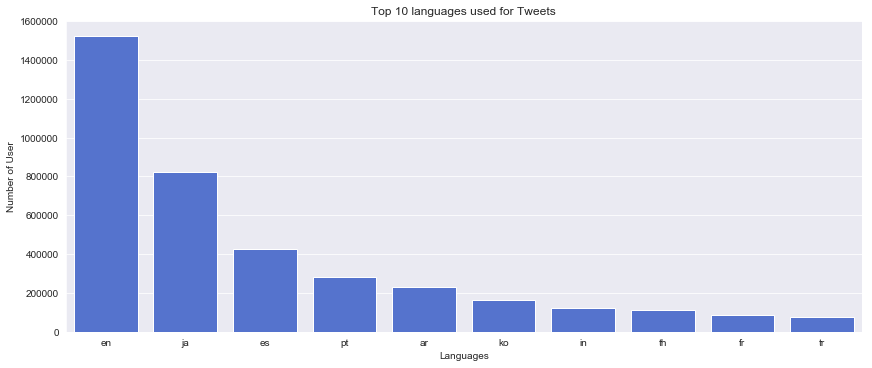

In [95]:
check = lang_pd.groupby(['lang']).size().reset_index(name='freq')
check = check.sort_values(ascending = False, by = 'freq')
# print (check.head(10))
_, ax1 = plt.subplots(1,1, figsize=(12, 5), constrained_layout=True)
sns.barplot(x= "lang", y="freq", data = check.head(10) , ax = ax1, palette=['royalblue']).set_title("Top 10 languages used for Tweets")
ax1.set(xlabel='Languages',ylabel="Number of User")

In [96]:
check.head(10)

lang     freq
15   en  1525389
33   ja   822525
16   es   426104
51   pt   280572
1    ar   231406
37   ko   162169
28   in   121415
62   th   111702
21   fr    89006
64   tr    77969

In [97]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [98]:
tweet_pd['code'] = tweet_pd['us_state'].transform(lambda x: us_state_abbrev[x] if x in us_state_abbrev.keys() else 'other')

state_code = tweet_pd.groupby(['code']).size().reset_index(name='freq')
state_code = state_code.sort_values(ascending = False, by = 'freq')

state_code = state_code[state_code['code']!= "other"]

In [100]:
fig = go.Figure(data=go.Choropleth(
    locations=state_code['code'], # Spatial coordinates
    z = state_code['freq'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Tweet Frequency",
))

fig.update_layout(
    title_text = 'Tweets all over USA',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [101]:
###time starts here #####

In [102]:
tweet_pd['Hour of Day'] = tweet_pd[['created_at', 'timezone']].apply(lambda x: tz_func(x.values), axis=1)
tweet_pd = tweet_pd[tweet_pd['Hour of Day']!=-1]

Text(0.5,1,'Frequency of Tweets as per Local Time in U.S. States')

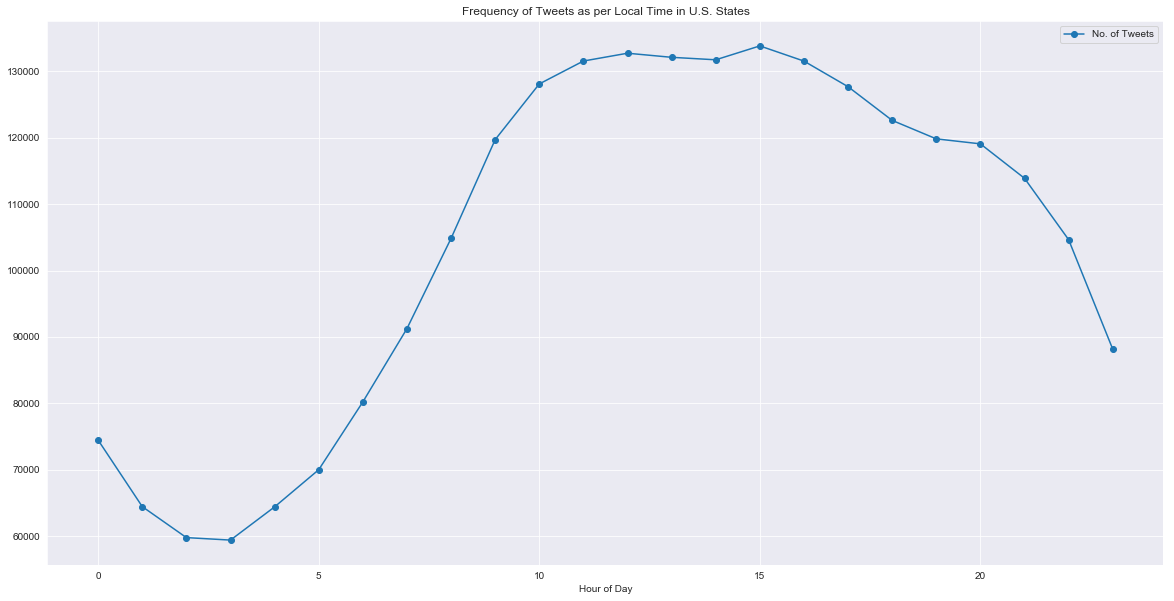

In [103]:
df_hour = tweet_pd.groupby('Hour of Day').size().reset_index(name="No. of Tweets")
_, ax = plt.subplots(figsize=(20,10))

df_hour.plot.line(x='Hour of Day', y='No. of Tweets', marker = 'o', ax=ax)
ax.set_title("Frequency of Tweets as per Local Time in U.S. States")

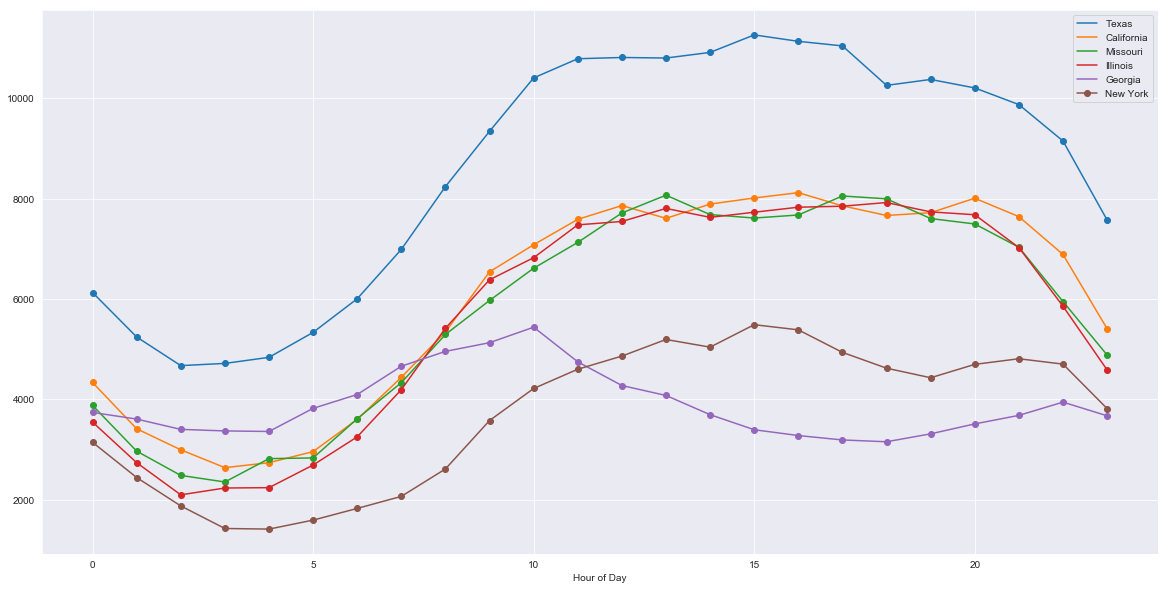

In [104]:
_, ax = plt.subplots(figsize=(20,10))
st_list = ['Texas', 'California', 'Missouri', 'Illinois', 'Georgia', 'New York']

for st in st_list:
    df_s = tweet_pd[tweet_pd['us_state'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

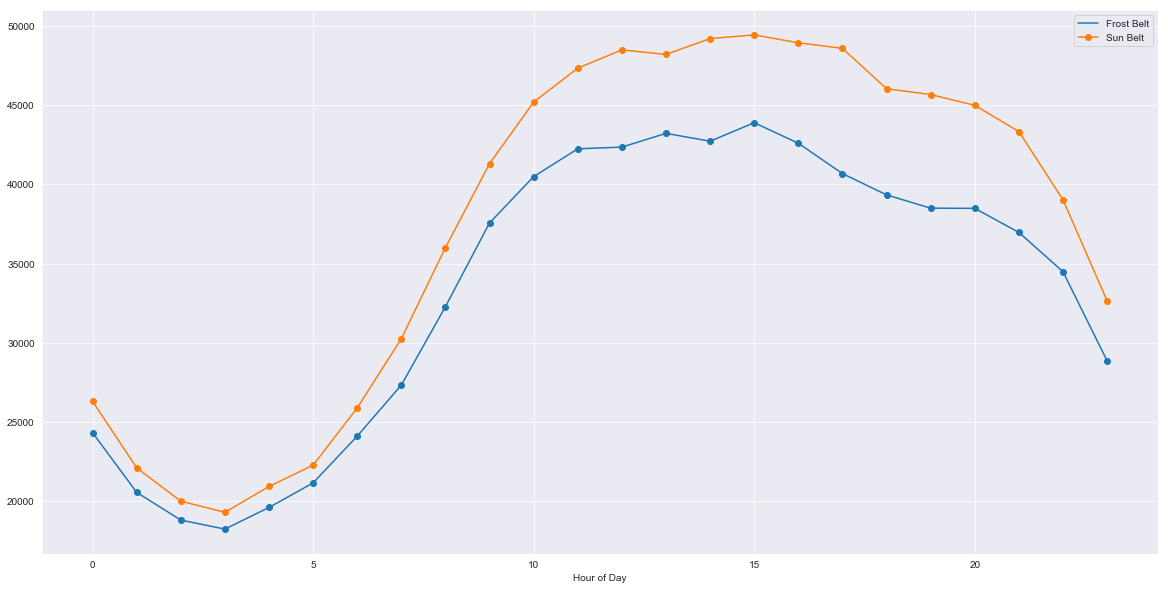

In [105]:
_, ax = plt.subplots(figsize=(20,10))
st_list = [ "Frost Belt", "Sun Belt"]

for st in st_list:
    df_s = tweet_pd[tweet_pd['Climate Belt'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

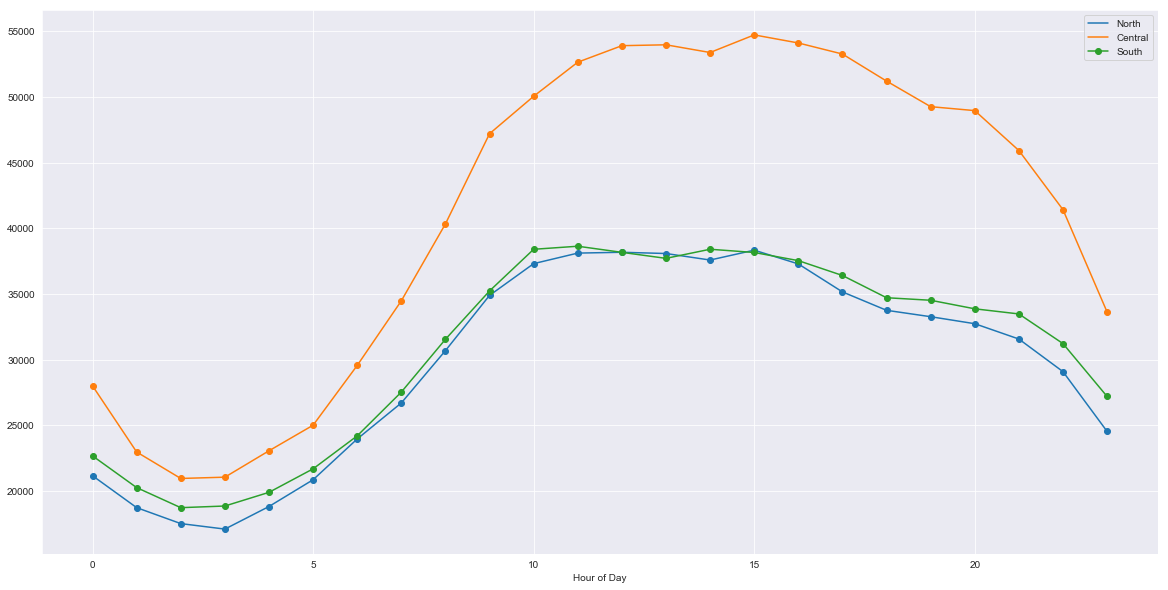

In [106]:
_, ax = plt.subplots(figsize=(20,10))
st_list = ['North', 'Central', 'South' ]

for st in st_list:
    df_s = tweet_pd[tweet_pd['Latitude Belt'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [108]:
tweet_pd["month"] = tweet_pd[["created_at","timezone"]].apply(lambda x: tz_month(x.values), axis=1)

month_pd = tweet_pd.groupby(['month']).size().reset_index(name='Freq')
month_pd = month_pd.sort_values(ascending = False, by = 'Freq')
month_pd = month_pd[month_pd['month']!=-1]

tweet_pd["season"] = tweet_pd["month"].transform(season)
tweet_pd["season"].head()

0      fall
2    winter
4    summer
6      fall
9    summer
Name: season, dtype: object

In [109]:
sun_pd = tweet_pd[tweet_pd['Climate Belt']=='Sun Belt']
frost_pd = tweet_pd[tweet_pd['Climate Belt']=='Frost Belt']

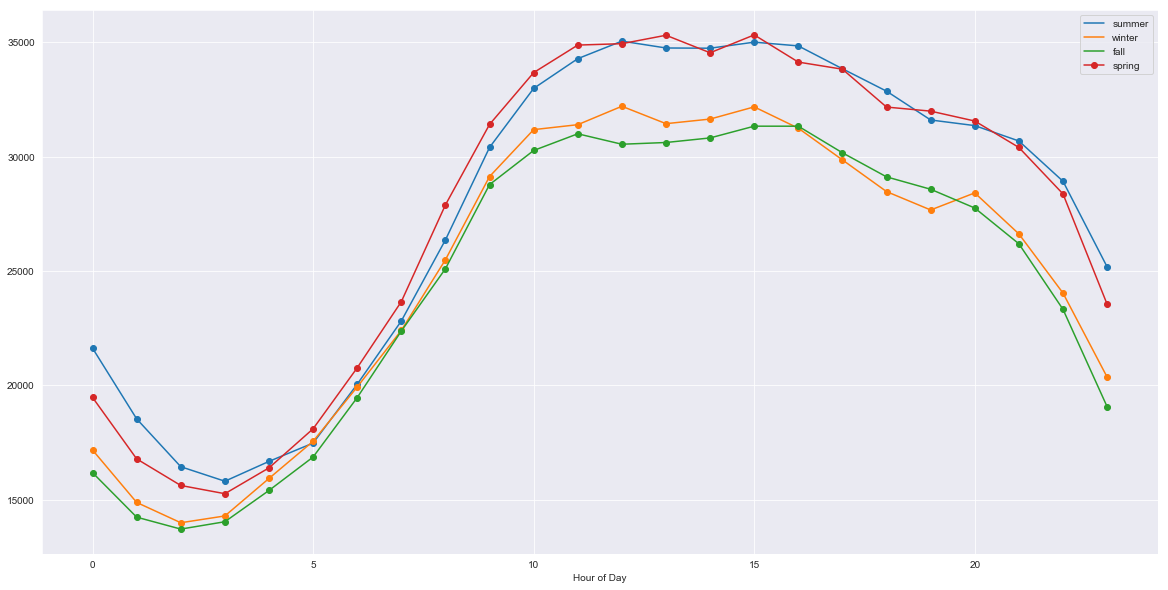

In [110]:
_, ax = plt.subplots(figsize=(20,10)) 
st_list = ['summer','winter','fall','spring']

for st in st_list:
    df_s = tweet_pd[tweet_pd['season'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

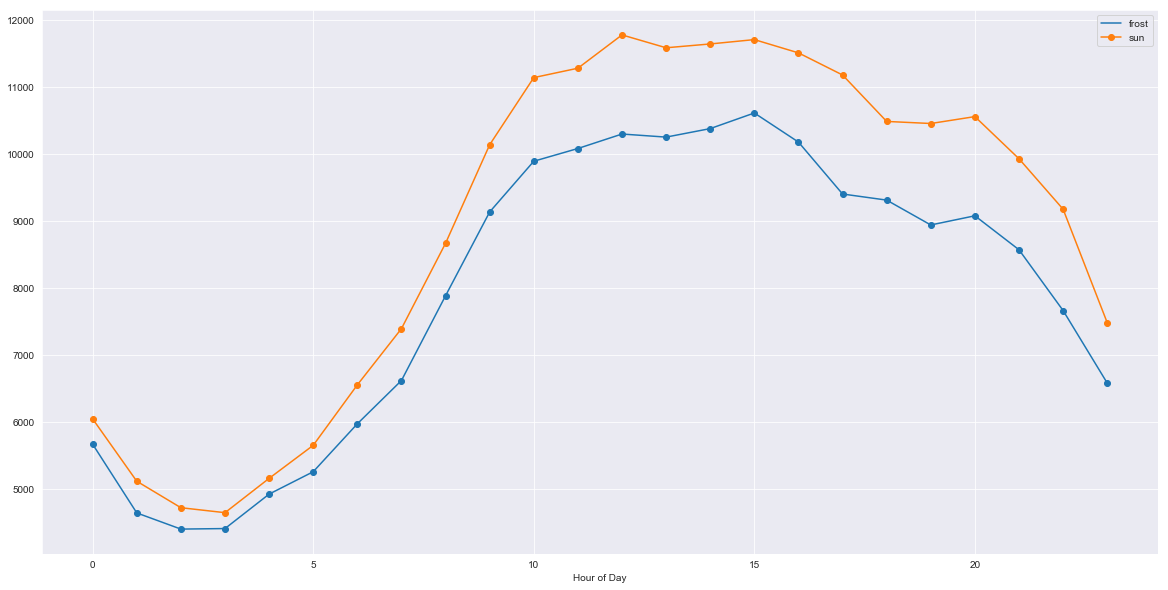

In [111]:

_, ax = plt.subplots(figsize=(20,10))
st = 'winter'
df_f = frost_pd[frost_pd['season'] == st]
df_ft = df_f.groupby('Hour of Day').size().reset_index(name='frost')
df_ft.plot.line(x='Hour of Day', y='frost', marker = 'o', ax=ax)

df_s = sun_pd[sun_pd['season'] == st]
df_st = df_s.groupby('Hour of Day').size().reset_index(name='sun')
df_st.plot.line(x='Hour of Day', y='sun', marker = 'o', ax=ax)

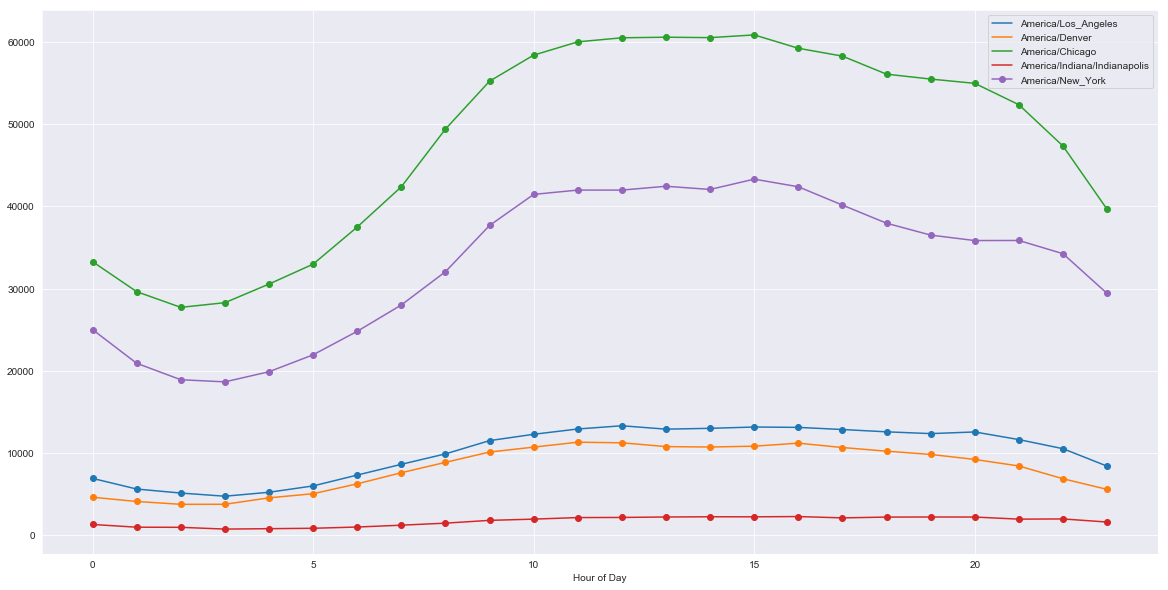

In [112]:
#timezone

st_list = ["America/Los_Angeles", "America/Denver",
      "America/Chicago", "America/Indiana/Indianapolis", "America/New_York"]
_, ax = plt.subplots(figsize=(20,10))

for st in st_list:
    df_s = tweet_pd[tweet_pd['timezone'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [115]:
unq_users['Hour of Day'] = unq_users[['created_at', 'timezone']].apply(lambda x: tz_func(x.values), axis=1)
unq_users = unq_users[unq_users['Hour of Day']!=-1]

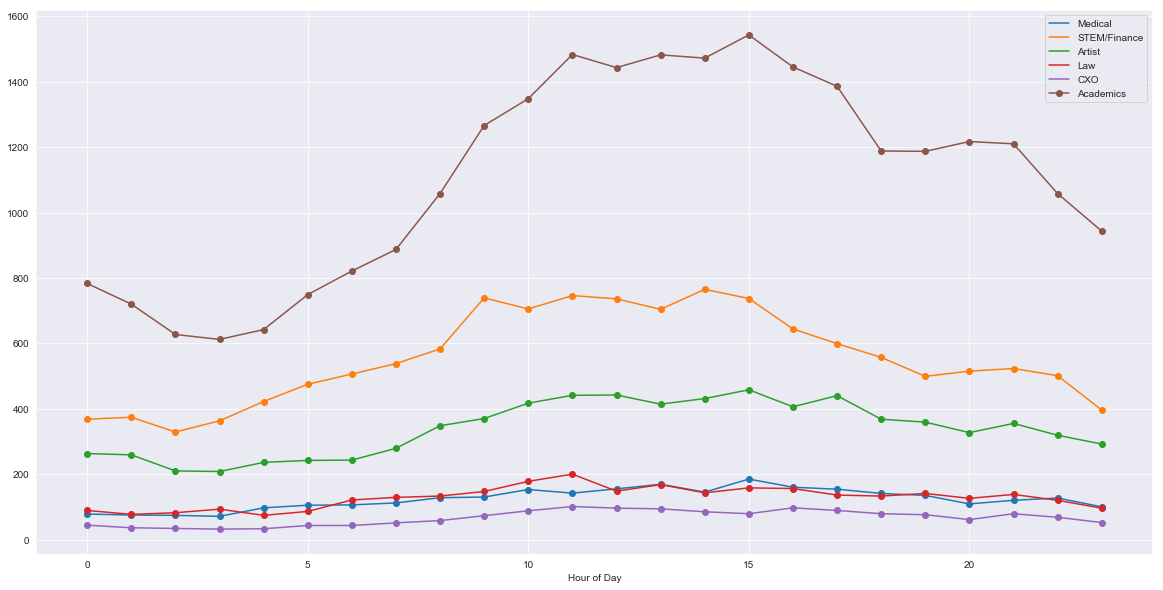

In [120]:
st_list = ["Medical", "STEM/Finance", "Artist", "Law", "CXO", "Academics"]
_, ax = plt.subplots(figsize=(20,10))

for st in st_list:
    df_s = unq_users[unq_users['Profession'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [122]:
top_lang_df  = lang_pd.groupby('lang').size().reset_index(name='freq')
top_lang_df = top_lang_df.sort_values(ascending=False, by='freq')
top_lang_df.head(10)

lang     freq
15   en  1525389
33   ja   822525
16   es   426104
51   pt   280572
1    ar   231406
37   ko   162169
28   in   121415
62   th   111702
21   fr    89006
64   tr    77969

In [125]:
lang_pd['Hour of Day'] = lang_pd[['created_at', 'timezone']].apply(lambda x: tz_func(x.values), axis=1)
lang_pd = lang_pd[lang_pd['Hour of Day']!=-1]

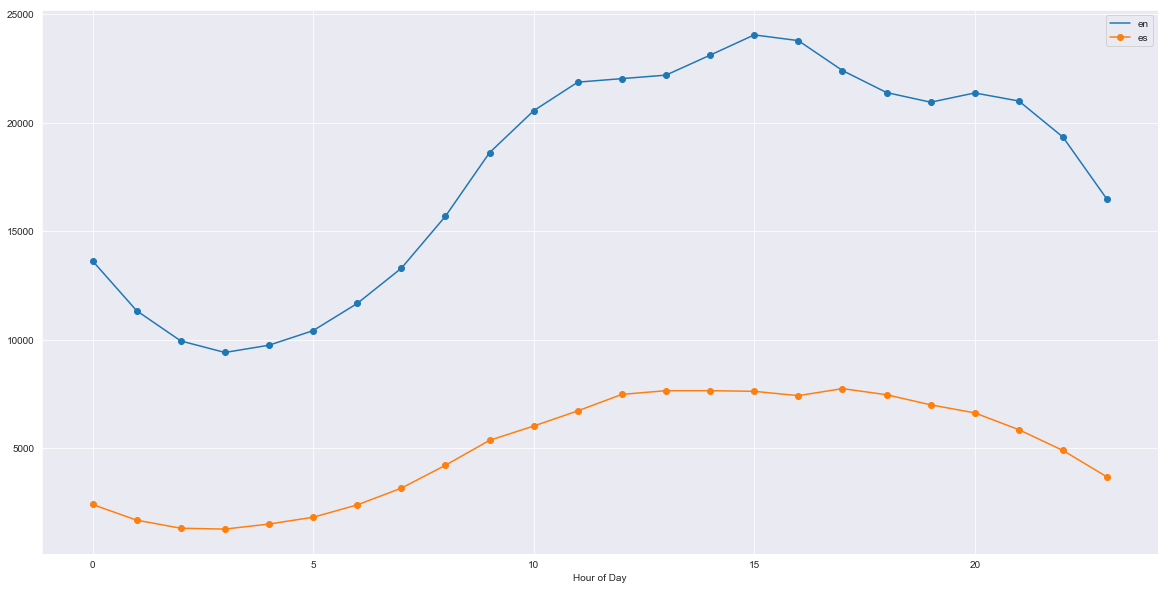

In [129]:
_, ax = plt.subplots(figsize=(20,10))
st_list = ['en','es']
# st_list = list(top_lang_df.head(10)['lang'])


for st in st_list:
    df_s = lang_pd[lang_pd['lang'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

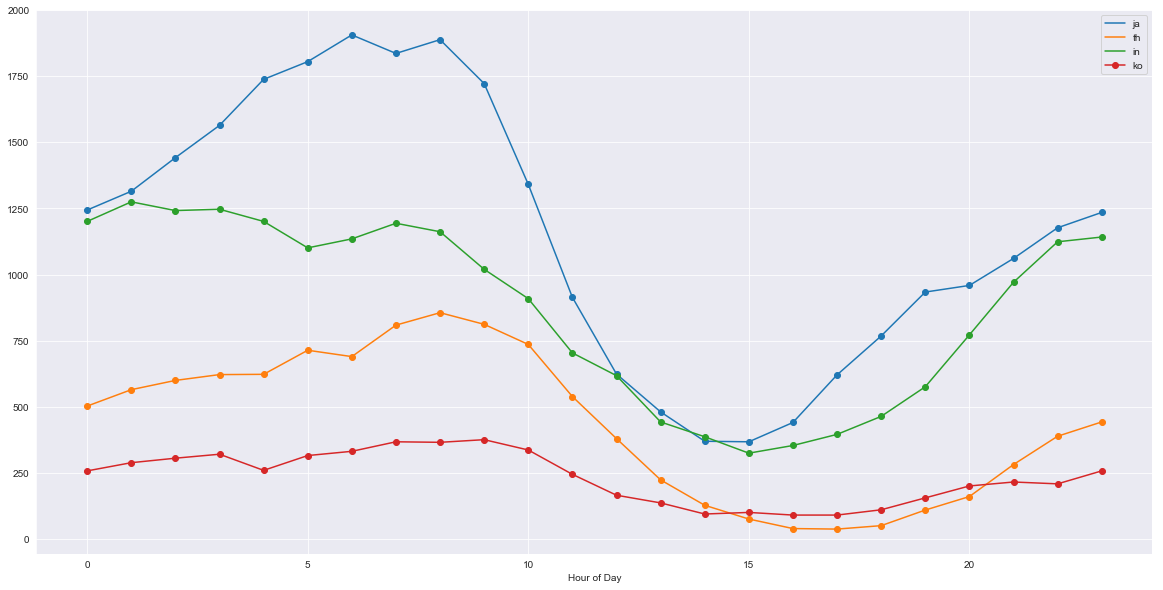

In [128]:
_, ax = plt.subplots(figsize=(20,10))
st_list = ['ja','th','in','ko']

for st in st_list:
    df_s = lang_pd[lang_pd['lang'] == st]
    df_st = df_s.groupby('Hour of Day').size().reset_index(name=st)
    df_st.plot.line(x='Hour of Day', y=st, marker = 'o', ax=ax)

In [130]:
tweet_pd["day"]  = tweet_pd[["created_at","timezone"]].apply(lambda x: tz_day(x.values), axis=1)
weekend_pd = tweet_pd[tweet_pd["day"].isin(['Saturday','Sunday'])]
weekday_pd = tweet_pd[tweet_pd["day"].isin(['Tuesday','Monday','Wednesday', 'Thursday', 'Friday'])]

df_w = weekday_pd.groupby('Hour of Day').size().reset_index(name="Weekday")
sum_w = df_w['Weekday'].sum()
df_w['Mean'] = df_w['Weekday'].transform(lambda x: float(x)/float(sum_w))

df_st = weekend_pd.groupby('Hour of Day').size().reset_index(name="Weekend")
sum_st = df_st['Weekend'].sum()
df_st['end_Mean'] = df_st['Weekend'].transform(lambda x: float(x)/float(sum_st))

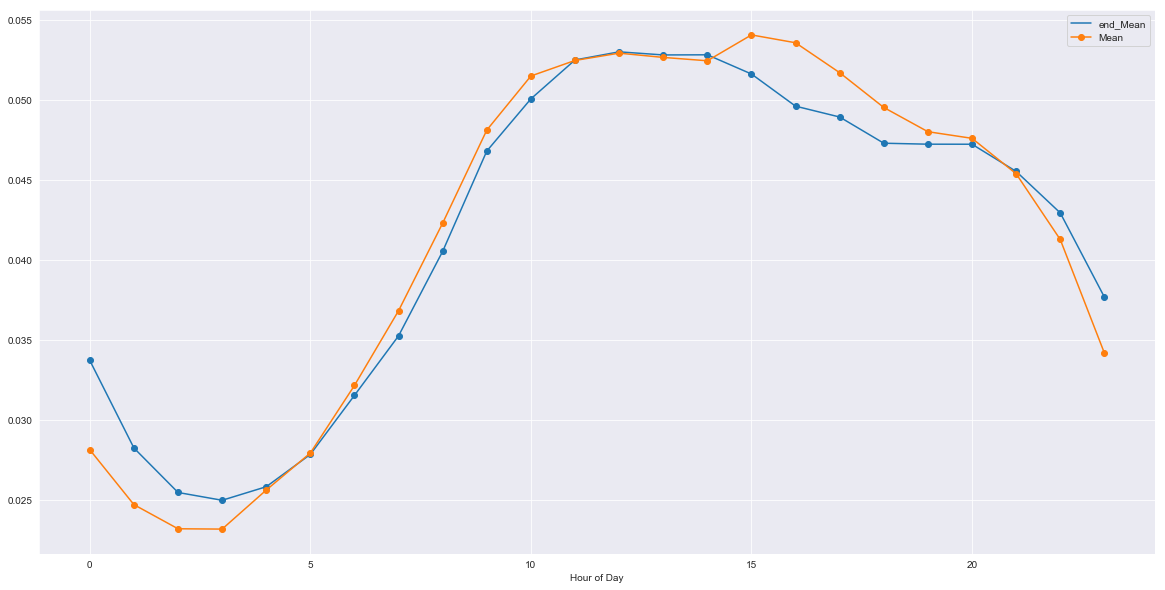

In [131]:
_, ax = plt.subplots(figsize=(20,10))

df_st.plot.line(x='Hour of Day', y="end_Mean", marker = 'o', ax=ax)
df_w.plot.line(x='Hour of Day', y="Mean", marker = 'o', ax=ax)